In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func



In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import datetime as dt

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

# D2: Determine the Precipitation Summary  for December & June.

In [16]:
# 2. Write a query that filters the Measurement table to retrieve the precipitation for the month of June. 
June_query = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==6).all()
December_query = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==12).all()

In [17]:
June_df = pd.DataFrame(June_query, columns=['date','precipitation'])
December_df = pd.DataFrame(December_query, columns=['date','precipitation'])

June_df.set_index(June_df['date'], inplace=True)

December_df.set_index(December_df['date'], inplace=True)

In [18]:
June_df = June_df.sort_index()
December_df = December_df.sort_index()

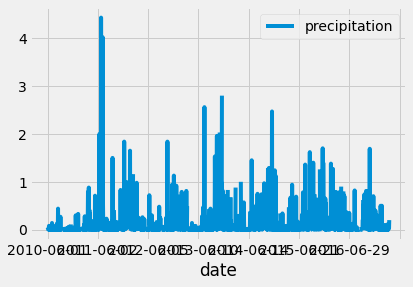

In [19]:
June_df.plot()


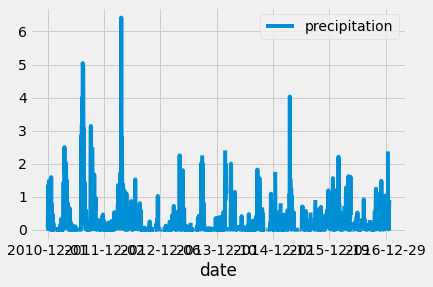

In [20]:
December_df.plot()